# **Modelling and Evaluating**

## Objectives

To answer business requirement 2:

* The client is interested in predicting if a cherry leaf is healthy or contains a posdery mildew.

## Inputs

* inputs/cherry-leaves/cherry-leaves/test
* inputs/cherry-leaves/cherry-leaves/train
* inputs/cherry-leaves/cherry-leaves/validation
* image shape embeddings created in DataVisualisation jupyter notebook

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

---

## Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread

2025-08-13 16:33:16.649669: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Set working directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/Users/lukenicklin/mildew-detection-in-cherry-leaves')
print("You set a new current working directory")

You set a new current working directory


In [4]:
work_dir = os.getcwd()
work_dir

'/Users/lukenicklin/mildew-detection-in-cherry-leaves'

---

## Set input directories

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/cherry-leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already avialable. Please create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already avialable. Please create a new version.


## Set label names

In [7]:
# Set label names
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


## Set image shape

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

## Images distribution

In [9]:
import pandas as pd
import os

# Create an empty list to store the data
my_data_dir = '/Users/lukenicklin/mildew-detection-in-cherry-leaves/inputs/cherry-leaves/cherry-leaves'
labels = ['powdery_mildew', 'healthy']

data_list = []

for folder in ['test', 'train', 'validation']:
    for label in labels:
        row_data = {
            'Set': folder,
            'Label': label,
            'Count': int(len(os.listdir(os.path.join(my_data_dir, folder, label))))
        }
        data_list.append(row_data)

        print(f"* {folder} - {label}: {row_data['Count']} images")

# Create the DataFrame from the list of dictionaries
df_freq = pd.DataFrame(data_list)

print("\n")
print(df_freq)

* test - powdery_mildew: 317 images
* test - healthy: 317 images
* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 315 images
* validation - healthy: 315 images


          Set           Label  Count
0        test  powdery_mildew    317
1        test         healthy    317
2       train  powdery_mildew   1472
3       train         healthy   1472
4  validation  powdery_mildew    315
5  validation         healthy    315


## Label distribution - bar chart

In [10]:
import plotly.express as px
import pandas as pd
import os

# Create a bar chart using Plotly Express
fig = px.bar(df_freq,
             x="Set",
             y="Count",
             color="Label",
             title="Cherry Leaves Dataset",
             text_auto=True)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_font_size=20,
    barmode='group'
    )
fig.show()
fig.write_image(f'{file_path}/label_distribution_bar.png')

## Set distribution - pie chart

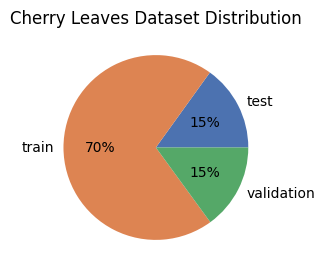

In [13]:
folders = os.listdir(my_data_dir)
data=[]
for folder in folders:
    for label in labels:
        n=int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
        n+=n
    data.append(n)

px = 1/plt.rcParams['figure.dpi']
plt.subplots(figsize=(800*px, 300*px))
colors = sns.color_palette("deep")[0:5]
plt.pie(data, labels = folders, colors = colors, autopct='%.0f%%')
plt.title('Cherry Leaves Dataset Distribution')
plt.savefig(f'{file_path}/set_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

---

## Image data augmentation

## Import ImageDataGenerator

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

## Set batch size

In [16]:
batch_size = 20

# Augment training image dataset

In [17]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

Found 2944 images belonging to 2 classes.


## Augment validation image dataset

In [18]:
validation_set = augmented_image_data.flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

Found 630 images belonging to 2 classes.


## Augment test image dataset

In [19]:
test_set = augmented_image_data.flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

Found 634 images belonging to 2 classes.


## Plot augmented training image set

(20, 256, 256, 3)


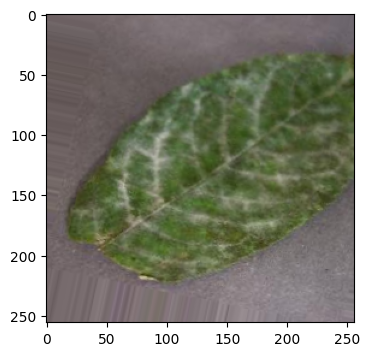

(20, 256, 256, 3)


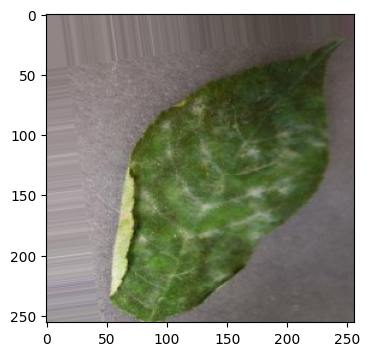

(20, 256, 256, 3)


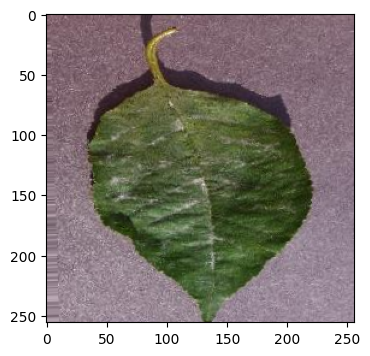

In [21]:
for _ in range(3):
    plt.figure(figsize=(4, 4))
    img, label = next(train_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation image set

(20, 256, 256, 3)


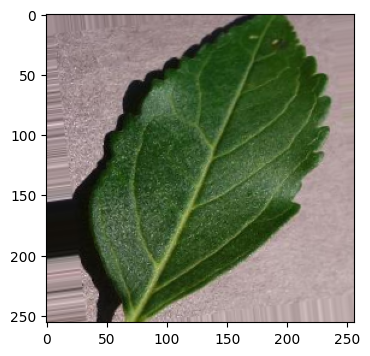

(20, 256, 256, 3)


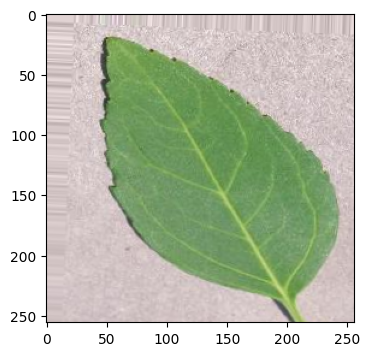

(20, 256, 256, 3)


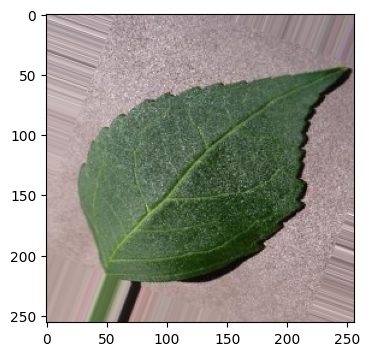

In [22]:
for _ in range(3):
    plt.figure(figsize=(4, 4))
    img, label = next(validation_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

# Plot augmented test image set

In [ ]:
for _ in range(3):
    plt.figure(figsize=(4, 4))
    img, label = next(test_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Save class indices

In [ ]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
